In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import os

### ML ET 
The goal of ML ET is to using the instantaneous measurements from the flux stations to calibrate remote sensing based model. SO it is a physics based ML model that utilizes intermediate steps in model outputs for bias correction of the final output. 
As of now I have 2 things in mind
1. Apply a sequential model(like RNN or LSTM) that takes an input array of the size of all features and model outputs and returns an output array of all the outputs of the model that is measured by an EC stations. 

2. The second model is somehow integrating the observations from EC station into the loss function, such that the model not only minimizes ET loss but all losses to make the model outputs closer to what we have from EC stations. 

As of now it seems that the 1st type if used to predict a landsat image or patch will generate 9-10 images at 30m resolution which seems an overkill but let's try it anyway to see if it works.

Axes(0.125,0.11;0.775x0.77)
['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'T_LST', 'NDWI', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_inst_af', 'LE_inst_af', 'FC_1_1_1', 'u_st', 'WS_MAX_1_1_1', 'WD_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'T_SONIC_1_1_1', 'CO2_1_1_1', 'H2O_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'W_SIGMA_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'FETCH_MAX_1_1_1', 'FETCH_70_1_1_1', 'FETCH_80_1_1_1', 'FETCH_90_1_1_1', 'TAU_SSITC_TEST_1_1_1', 'H_SSITC_TEST_1_1_1', 'LE_SSITC_TEST_1_1_1', 'FC_SSITC_TEST_1_1_1', 'PA_1_1_1', 'Temp_st', 'TA_2_1_1', 'RH_st', 'RH_2_1_1', 'SW_IN_inst_af', 'LW_IN_st', 'SW_OUT_1_1_1', 'LW_OUT_st', 'NETRAD_1_1_2', 'SW_IN_1_1_2', 'PPFD_IN_1_1_1', 'Precip_st', 'G_1_1_1', 'G

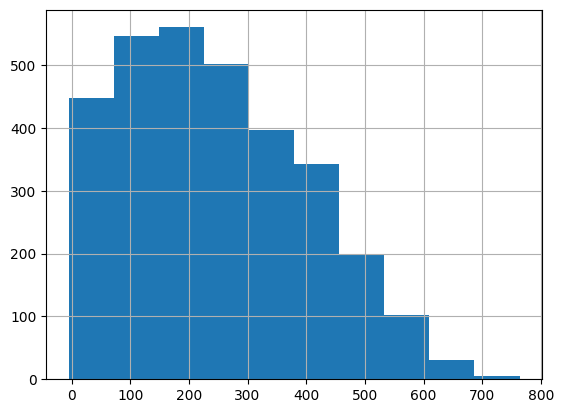

In [2]:
## Read the datasets, remoeve shady values and perform a random forest 
os.chdir("D:\\Backup\\Rouhin_Lenovo\\US_project\\GEE_SEBAL_Project\\Csv_Files\\run2_miguel\\ML_ready\\RF_bias")
file_list=os.listdir()
error_list=[]
for i in range(len(file_list)):
    error_list.append(pd.read_csv(file_list[i],parse_dates=["Date"]))
print(pd.concat(error_list)["LEinst"].hist()) ## looks good both HInst and LEinst 
print(error_list[0].columns.tolist())
# for i in range(len(file_list)):
#     # error_list[i]=
#     error_list[i]=error_list[i][error_list[i]["LE_closed"]>=0]
#     error_list[i]["Closure"]=error_list[i]["Rn_unclosed"]-error_list[i]["H_closed"]-error_list[i]["LE_closed"]-error_list[i]["G_unclosed"]
#     # print(error_list[i].shape)

In [16]:
## Get the total df for LSTM model 
df=pd.concat(error_list)
df.columns.tolist()
# ml_df=df[[]]
## Let's only take the inputs we talked about 
df=df[["Veg","latitude","longitude","B","R","GR","NIR","SWIR_1","SWIR_2","NDVI","NDWI","ALFA","Albedo","Tao_sw","Tao_sw_am","Rs_down","SW_IN_inst_af","Rl_down","LW_IN_st","Rl_up","LW_OUT_st","Rn","Rn_inst_af","Ginst","G_inst_af","Hinst","H_inst_af","LEinst","LE_inst_af","LE_eto_ups","LE_closed"]]
## Input array 
# df
df.dropna()
df.groupby("Veg").count()

,latitude,longitude,B,R,GR,NIR,SWIR_1,SWIR_2,NDVI,NDWI,...,Rn,Rn_inst_af,Ginst,G_inst_af,Hinst,H_inst_af,LEinst,LE_inst_af,LE_eto_ups,LE_closed
Veg,,,,,,,,,,,,,,,,,,,,,
CRO,886,886,886,886,886,886,886,886,884,886,...,886,886,886,880,886,868,886,865,886,886
CSH,229,229,229,229,229,229,229,229,229,229,...,229,229,229,229,229,229,229,224,229,229
DBF,98,98,98,98,98,98,98,98,98,98,...,98,98,98,93,98,97,98,95,98,98
ENF,410,410,410,410,410,410,410,410,410,410,...,410,408,410,404,410,406,410,404,410,410
GRA,710,710,710,710,710,710,710,710,710,710,...,710,707,710,700,710,688,710,697,710,708
OSH,228,228,228,228,228,228,228,228,228,228,...,228,228,228,227,228,228,228,214,228,228
SAV,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
WET,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
WSA,402,402,402,402,402,402,402,402,402,402,...,402,396,402,399,402,401,402,401,402,402


In [15]:
## Right now 
print(error_list[0].columns.to_list())

['Unnamed: 0.2', 'date', 'Rs_down', 'Rl_up', 'Rl_down', 'Rn', 'Ginst', 'Hinst', 'LEinst', 'LE_Daily_model', 'ETo_model_hourly', 'Rn24h_G', 'AirT_G', 'RH_G', 'ux_G', 'SW_Down', 'NDVI', 'ET_24h', 'ALFA', 'Tao_sw', 'UB', 'B', 'GR', 'R', 'NIR', 'SWIR_1', 'SWIR_2', 'T_LST', 'NDWI', 'Datetime_Local_x', 'Datetime_GMT', 'Unnamed: 0.1', 'Unnamed: 0', 'TIMESTAMP_START', 'TIMESTAMP_END', 'TAU_1_1_1', 'H_inst_af', 'LE_inst_af', 'FC_1_1_1', 'u_st', 'WS_MAX_1_1_1', 'WD_1_1_1', 'USTAR_1_1_1', 'MO_LENGTH_1_1_1', 'T_SONIC_1_1_1', 'CO2_1_1_1', 'H2O_1_1_1', 'U_SIGMA_1_1_1', 'V_SIGMA_1_1_1', 'W_SIGMA_1_1_1', 'T_SONIC_SIGMA_1_1_1', 'FETCH_MAX_1_1_1', 'FETCH_70_1_1_1', 'FETCH_80_1_1_1', 'FETCH_90_1_1_1', 'TAU_SSITC_TEST_1_1_1', 'H_SSITC_TEST_1_1_1', 'LE_SSITC_TEST_1_1_1', 'FC_SSITC_TEST_1_1_1', 'PA_1_1_1', 'Temp_st', 'TA_2_1_1', 'RH_st', 'RH_2_1_1', 'SW_IN_inst_af', 'LW_IN_st', 'SW_OUT_1_1_1', 'LW_OUT_st', 'NETRAD_1_1_2', 'SW_IN_1_1_2', 'PPFD_IN_1_1_1', 'Precip_st', 'G_1_1_1', 'G_inst_af', 'G_3_1_1', 'G_4_1